#**Name: Akash Badhautiya**

#**Roll no: 24AI60R43**

#**Task 1**


In [ ]:
#Load and preprocess the Bike Sharing dataset
#Check for missing and duplicate values
#Remove it (If found)

In [1]:
pip install ucimlrepo #installing ucimlrepo

In [7]:
from ucimlrepo import fetch_ucirepo #importing fetch_ucirepo from ucimlrepo
import pandas as pd  #importing pandas for data manipulation

# fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets

# metadata
print(bike_sharing.metadata)

# variable information
print(bike_sharing.variables)


{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'published_in': 'Progress in Artificial Intelli

In [8]:
#remove  dteday from feature
X = X.drop(['dteday'], axis=1)

# check for missing value
print(X.isnull().sum())

# Removing the missing value if exits
X = X.dropna()

# checking for duplicate values
print(X.duplicated().sum())

# remove duplicate if any
X = X.drop_duplicates() # Removed inplace=True

import pandas as pd
print(X.head(10))

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
dtype: int64
10
   season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   
5       1   0     1   5        0        6           0           2  0.24   
6       1   0     1   6        0        6           0           1  0.22   
7       1   0     1   7        0        6           0           1  0.20   
8       1   0     1   8        0        6           0           1  0.24   
9       1   0     1   9        0        6 

#**Task 2**


In [9]:
#Perform one-hot encoding of the categorical features when necessary
# (not necessary if there is a natural ordering between categories)

#Perform feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#list of categorical column
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

#one-hot encoding categorical columns

X = pd.get_dummies(X, columns=categorical_columns,drop_first=True)

# Ensure y has the same number of rows as X before feature scaling
y = y.iloc[:len(X)]

#feature scaling
X_scale = scaler.fit_transform(X)
print(X_scale[:5])

# Check the shapes of X_scale and y to identify the mismatch
print("Shape of X_scale:", X_scale.shape)
print("Shape of y:", y.shape)



[[-1.33490177 -1.09345607  0.94737422 -1.55471698 -0.58300125 -0.5908033
  -0.56722228 -1.00502153 -0.2892509  -0.30440897 -0.30032621 -0.3058744
  -0.300554   -0.30598694 -0.30452186 -0.30032621 -0.30191831 -0.30021227
  -0.30519863 -0.20840791 -0.2072019  -0.20431382 -0.20416087 -0.20750395
  -0.20855825 -0.20900874 -0.20870851 -0.20870851 -0.20900874 -0.20900874
  -0.20915872 -0.20930861 -0.20930861 -0.20930861 -0.20945842 -0.20930861
  -0.20915872 -0.20915872 -0.20915872 -0.20915872 -0.20915872 -0.20915872
  -0.1721632  -0.40802889 -0.40543337 -0.40754878 -0.40716451 -0.40841281
   2.43308864 -1.46686625 -0.59523776 -0.29827088 -0.01314349]
 [-1.43877803 -1.18191084  0.89554632 -1.55471698 -0.58300125 -0.5908033
  -0.56722228 -1.00502153 -0.2892509  -0.30440897 -0.30032621 -0.3058744
  -0.300554   -0.30598694 -0.30452186 -0.30032621 -0.30191831 -0.30021227
  -0.30519863  4.79828231 -0.2072019  -0.20431382 -0.20416087 -0.20750395
  -0.20855825 -0.20900874 -0.20870851 -0.20870851 -0.

#**Task 3**


In [13]:
#We will split the dataset into training (70%), validation (15%),
# and test (15%) sets.

from sklearn.model_selection import train_test_split #importing train_test_split from sklearn.model_selection

X_train, X_temp, y_train, y_temp = train_test_split(X_scale, y, test_size=0.3, random_state=46)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=46)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Training set size: 12158
Validation set size: 2605
Test set size: 2606


#**Task 4**

In [ ]:
#Model Design: Design a neural network having N hidden layers
#The number of units in each hidden layer as 128, 64, 32, and so on
#Activation function in each hidden layer: ReLU
#What activation function should you choose for the output layer for this prediction problem?

In [14]:
import torch  #importing torch
import numpy as np  #importing numpy

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [17]:
import torch #importing torch
import torch.nn as nn #importing nn from torch
import torch.optim as optim #importing optim from torch
import matplotlib.pyplot as plt #importing plt from matplotlib.pyplot

class VariableNN(nn.Module): #creating a class VariableNN that inherits from nn.Module
    def __init__(self, input_size, hidden_layers, output_size): #initializing the class with input_size, hidden_layers, and output_size as arguments
        super(VariableNN, self).__init__() #calling the constructor of the parent class nn.Module
        layers = [] #creating an empty list layers
        prev_size = input_size #initializing previous_size with input

        # Create hidden layers
        for hidden_size in hidden_layers: #iterating over each hidden size in the hidden_layers list
            layers.append(nn.Linear(prev_size, hidden_size)) #adding a linear layer with previous_size and hidden_size to the layers list
            layers.append(nn.ReLU()) #appending nn.Relu() to layers
            prev_size = hidden_size #updating previous_size with the current hidden_size

        # Output layer
        layers.append(nn.Linear(prev_size, output_size)) #adding a linear layer with previous_size and output_size to the layers list
        self.model = nn.Sequential(*layers)

    def forward(self, x): #defining the forward method
        return self.model(x)


#**Task 5**

In [19]:
def train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs=100):
    # This function is used to train a model over a specified number of epochs.
    # It tracks both the training and validation losses and returns them at the end.

    train_losses = []  # List to keep track of training loss for each epoch.
    val_losses = []    # List to keep track of validation loss for each epoch.

    for epoch in range(epochs):  # Loop through the defined number of epochs.
        model.train()  # Set the model to training mode.
        optimizer.zero_grad()  # Reset gradients before the backward pass to avoid accumulation.

        # Forward pass: Feed the training data into the model to get predictions.
        y_pred_train = model(X_train_tensor)

        # Calculate the loss between predicted and actual training labels.
        train_loss = criterion(y_pred_train, y_train_tensor)

        # Backward pass: Compute gradients for all learnable parameters.
        train_loss.backward()

        # Update model parameters based on the gradients using the optimizer.
        optimizer.step()

        # Store the training loss for this epoch.
        train_losses.append(train_loss.item())

        # Validation phase: Now we evaluate the model on the validation set.
        model.eval()  # Set model to evaluation mode (no training here).
        with torch.no_grad():  # Turn off gradient computation for faster validation.
            y_pred_val = model(X_val_tensor)  # Make predictions on validation data.

            # Calculate the loss on the validation set.
            val_loss = criterion(y_pred_val, y_val_tensor)

            # Store the validation loss for this epoch.
            val_losses.append(val_loss.item())

        # Every 10 epochs, print the current training and validation losses.
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Training Loss: {train_loss.item()}, Validation Loss: {val_loss.item()}')

    # Return the lists of training and validation losses at the end of all epochs.
    return train_losses, val_losses

def evaluate_model(model, X_test_tensor, y_test_tensor):
    # This function is used to evaluate the model's performance on the test set.
    model.eval()  # Set the model to evaluation mode.

    # Disable gradient computation as we're not updating model weights here.
    with torch.no_grad():
        # Make predictions on the test data.
        y_pred_test = model(X_test_tensor)

        # Calculate the Mean Squared Error (MSE) on the test set.
        test_loss = nn.MSELoss()(y_pred_test, y_test_tensor)

    # Return the test loss as a single value.
    return test_loss.item()


#**Task 6**

In [20]:
from sklearn.model_selection import train_test_split

# Define multiple configurations for the hidden layers in the neural network.
# Each configuration represents a different number of hidden layers and units in each layer.
hidden_layer_configs = [
    [128, 64, 32],  # Three hidden layers: 128 units, 64 units, and 32 units.
    [128, 64],      # Two hidden layers: 128 units and 64 units.
    [128],          # One hidden layer with 128 units.
    [64, 32],       # Two hidden layers: 64 units and 32 units.
    [64],           # One hidden layer with 64 units.
]

# Variables to track the best performing model and its configuration.
best_model = None           # Placeholder for the best model.
best_config = None          # Placeholder for the best hidden layer configuration.
best_val_loss = float('inf')  # Initialize best validation loss to a very high value (infinity).
all_train_losses = []       # List to store the training losses for all configurations.
all_val_losses = []         # List to store the validation losses for all configurations.

# Loop through each hidden layer configuration to train a model.
for config in hidden_layer_configs:
    print(f'Training model with hidden layers: {config}')  # Display current configuration being trained.

    # Create a new model for each configuration of hidden layers.
    # The model has the input size based on training data, variable hidden layers, and one output unit.
    model = VariableNN(input_size=X_train_tensor.shape[1], hidden_layers=config, output_size=1)

    # Define the loss function (Mean Squared Error) and the optimizer (Adam).
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model using the current configuration of hidden layers.
    # The function returns the lists of training and validation losses over epochs.
    train_losses, val_losses = train_model(
        model, criterion, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs=100
    )

    # Append the training and validation losses for this configuration.
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

    # Get the final validation loss (after all epochs) for this configuration.
    final_val_loss = val_losses[-1]  # Last value in validation loss list.

    # If this model's validation loss is better than the previous best, update the best model and configuration.
    if final_val_loss < best_val_loss:
        best_val_loss = final_val_loss  # Update the best validation loss.
        best_model = model              # Save the best model.
        best_config = config            # Save the best hidden layer configuration.

# After training all configurations, print the best configuration based on validation loss.
print(f'Best hidden layer configuration: {best_config}')


Training model with hidden layers: [128, 64, 32]
Epoch 0, Training Loss: 68740.296875, Validation Loss: 67747.78125
Epoch 10, Training Loss: 68559.46875, Validation Loss: 67558.4453125
Epoch 20, Training Loss: 68139.8515625, Validation Loss: 67097.0546875
Epoch 30, Training Loss: 67133.0703125, Validation Loss: 66005.1875
Epoch 40, Training Loss: 64992.34375, Validation Loss: 63710.48828125
Epoch 50, Training Loss: 60910.3515625, Validation Loss: 59388.328125
Epoch 60, Training Loss: 54005.48828125, Validation Loss: 52192.34375
Epoch 70, Training Loss: 44015.625, Validation Loss: 42025.9375
Epoch 80, Training Loss: 32732.60546875, Validation Loss: 31068.326171875
Epoch 90, Training Loss: 25126.173828125, Validation Loss: 24522.39453125
Training model with hidden layers: [128, 64]
Epoch 0, Training Loss: 68693.3515625, Validation Loss: 67685.734375
Epoch 10, Training Loss: 68360.4140625, Validation Loss: 67343.4140625
Epoch 20, Training Loss: 67851.0859375, Validation Loss: 66802.953125

#**Task 7**

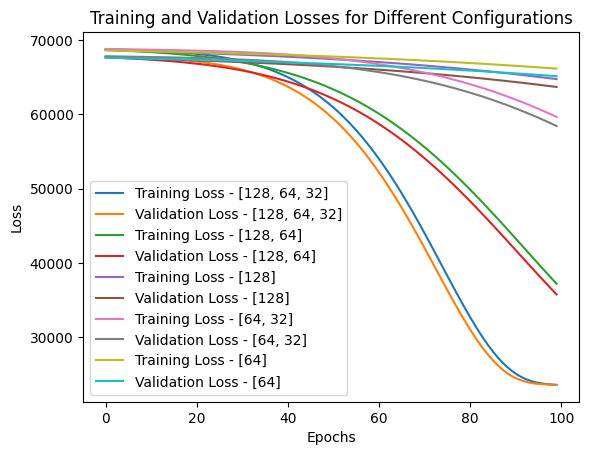

In [21]:
# Plot the training and validation losses for all the hidden layer configurations.
for i, config in enumerate(hidden_layer_configs):
    # Plot the training loss for the current configuration.
    plt.plot(all_train_losses[i], label=f'Training Loss - {config}')

    # Plot the validation loss for the same configuration.
    plt.plot(all_val_losses[i], label=f'Validation Loss - {config}')

# Set the label for the x-axis to indicate epochs (number of iterations).
plt.xlabel('Epochs')

# Set the label for the y-axis to represent the loss values.
plt.ylabel('Loss')

# Give the plot a title that describes what’s being visualized.
plt.title('Training and Validation Losses for Different Configurations')

# Add a legend to distinguish between different configurations and loss types.
plt.legend()

# Display the plot to visualize how the losses change over epochs for each configuration.
plt.show()


#**Task 8**

In [ ]:
print(f'Best hidden layer configuration: {best_config}')

Best hidden layer configuration: [128, 64, 32]


### Justification:

**Validation Loss:**
- **[128, 64, 32]:** Best performance with a final validation loss of 24,401.16, capturing the data's complexity effectively without overfitting.
- **[128, 64]:** Moderate performance with a final validation loss of 43,474.55, indicating slight underfitting.
- **[128]:** Slower loss reduction, final loss of 64,621.08, showing insufficient capacity.
- **[64, 32]:** Slight improvement, but still higher loss at 59,923.09.
- **[64]:** Worst performance, final loss of 66,125.46, insufficient complexity.

**Training Loss:**
- **[128, 64, 32]:** Best convergence with aligned training and validation losses.
- **[Other configs]:** Larger gaps between training and validation losses, suggesting underfitting or overfitting in simpler models.

**Conclusion:**
The **[128, 64, 32]** configuration is optimal, balancing model complexity and minimizing both training and validation loss.

#**Task 9**

In [22]:
# Test the best-performing model on the test dataset.
# This evaluates the model that had the lowest validation loss during training.

test_loss = evaluate_model(best_model, X_test_tensor, y_test_tensor)

# Print the test Mean Squared Error (MSE) loss for the best model.
print(f'Test MSE Loss for the best model: {test_loss}')


Test MSE Loss for the best model: 23661.126953125


#**Task 10**

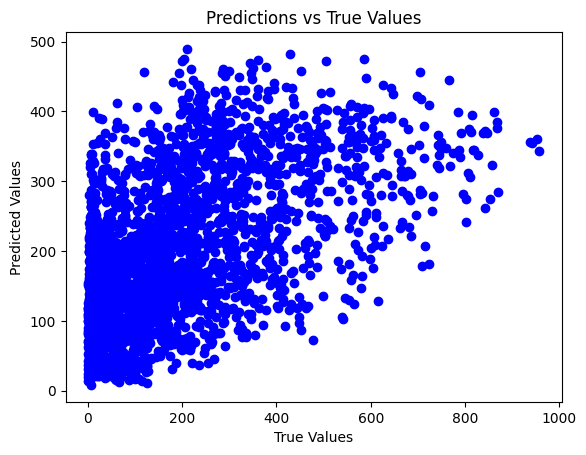

In [23]:
def plot_predictions_vs_true(model, X_test_tensor, y_test_tensor):
    # This function plots the predicted values vs the actual (true) values for the test data.

    model.eval()  # Set the model to evaluation mode to ensure no updates during testing.

    with torch.no_grad():  # Disable gradient calculation since we are not training.
        predictions = model(X_test_tensor)  # Get the model's predictions for the test data.

    # Create a scatter plot to compare true values (y_test_tensor) with the predicted values.
    plt.scatter(y_test_tensor.numpy(), predictions.numpy(), color='blue')  # Plot true vs predicted.

    # Label the x-axis as 'True Values' (actual values from the test set).
    plt.xlabel('True Values')

    # Label the y-axis as 'Predicted Values' (values predicted by the model).
    plt.ylabel('Predicted Values')

    # Give the plot a title to explain what the graph is showing.
    plt.title('Predictions vs True Values')

    # Display the plot.
    plt.show()

# Call the function to plot predictions vs true values for the best model.
plot_predictions_vs_true(best_model, X_test_tensor, y_test_tensor)
